In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import os
import datascience as dt
%matplotlib inline

In [2]:
directory_path = './data/toymodel 40/'

In [3]:
def read_csv_files_into_dataframe(directory_path):

    header  = ['EventID','TrackID','Particle','EnergyDeposited','XPosition','YPosition','ZPosition','LocalTime','Volume','Initial Energy']
    # Get a list of all files in the given directory
    file_list = os.listdir(directory_path)
    
    # Filter the list to include only CSV files
    csv_files = [file for file in file_list if file.endswith('.csv')]
    
    # Initialize an empty DataFrame to store the combined data
    combined_dataframe = pd.DataFrame()
    
    # Loop through each CSV file and read it into a DataFrame, then concatenate it to the combined DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(directory_path, csv_file)
        df = pd.read_csv(file_path, skiprows = 14, names = header)
        combined_dataframe = pd.concat([combined_dataframe, df], ignore_index=True)
    
    return combined_dataframe

combined_df = read_csv_files_into_dataframe(directory_path)
combined_df = dt.Table.from_df(combined_df)

# Now, the 'combined_df' variable holds the pandas DataFrame with data from all CSV files.


In [4]:
combined_df

EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy
6074,11,e-,6.05447e-24,0.364682,0.791031,2.5,2.29601,physSiliconSubstrate,1.24949
6074,11,e-,2.57301e-27,0.363774,0.790932,2.50015,2.29605,physSiliconOxide2,1.24949
6074,11,e-,8.5767e-27,0.360749,0.790604,2.50065,2.2962,physSiliconNitride2,1.24949
6177,42,anti_nu_e,0,2.02737,-1.87883,2.5,0.176847,physSiliconSubstrate,824.844
6177,42,anti_nu_e,0,2.02689,-1.87881,2.50015,0.176849,physSiliconOxide2,824.844
6177,42,anti_nu_e,0,2.02532,-1.87874,2.50065,0.176855,physSiliconNitride2,824.844
6553,5,anti_nu_e,0,-2.5,1.08614,1.291,0.171684,physSiliconSubstrate,24.173
6654,11,anti_nu_e,0,-2.5,0.700013,-2.49226,0.194821,physSiliconSubstrate,664.263
6661,33,gamma,0,-2.5,-1.88959,1.14729,0.169774,physSiliconSubstrate,238.632
6674,15,e-,7.33988e-24,-2.5,-1.64844,0.295013,1.65987,physSiliconSubstrate,2.74899


In [5]:
gamma = combined_df.where('Particle', dt.are.containing('gamma'))
# gamma = gamma.where('EnergyDeposited', dt.are.not_equal_to(0))
gamma = gamma.where('Initial Energy', dt.are.below_or_equal_to(2700))
gamma

EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy
6661,33,gamma,0,-2.5,-1.88959,1.14729,0.169774,physSiliconSubstrate,238.632
12374,37,gamma,0,-2.5,0.720676,-1.8028,0.167454,physSiliconSubstrate,238.632
17235,14,gamma,0,0.531025,2.06886,2.50015,0.188875,physSiliconNitride2,911.209
17235,14,gamma,0,0.530008,2.06883,2.5,0.188878,physSiliconOxide2,911.209
17235,14,gamma,0,-2.5,1.98384,2.0531,0.199098,physSiliconSubstrate,911.209
27177,14,gamma,0,-2.5,-2.24982,-2.14659,0.1697,physSiliconSubstrate,755.314
35212,14,gamma,0,-0.136332,2.22952,-2.5,0.181712,physSiliconSubstrate,911.209
35212,14,gamma,0,-0.136911,2.22956,-2.50015,0.181714,physSiliconOxide1,911.209
35212,14,gamma,0,-0.138839,2.22968,-2.50065,0.181721,physSiliconNitride1,911.209
35283,14,gamma,0,-1.37369,-1.12956,-2.5,0.1723,physSiliconSubstrate,298.989


<Figure size 640x480 with 0 Axes>

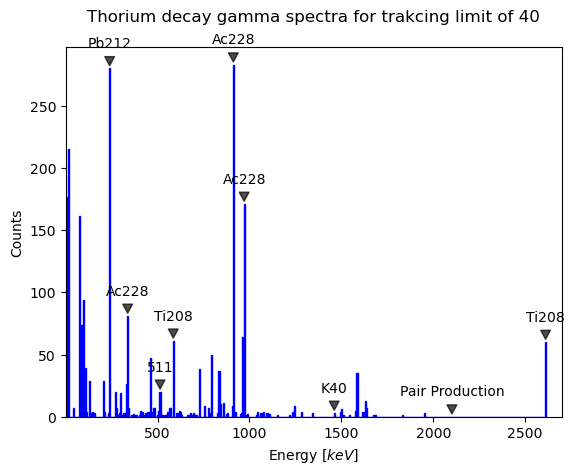

In [6]:
def annotate_peaks(ax, x_values, y_values, labels):
    for x, y, label in zip(x_values, y_values, labels):
        ax.annotate(label, xy=(x, y), xytext=(x, y + 20),  # Adjust xytext to control the label position
                    arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.7),
                    horizontalalignment='center', verticalalignment='center')



x_irl = [238.6, 338.3, 511, 583.2, 911.2, 968.9, 1460, 2103, 2614.5]
material_names = ['Pb212', 'Ac228', '511', 'Ti208', 'Ac228', 'Ac228', 'K40', 'Pair Production', 'Ti208']

plt.clf()
fig, ax = plt.subplots()
counts, bin_edges, patches = ax.hist(gamma['Initial Energy'], bins = 400, color = 'b', edgecolor = 'blue')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

x_sim = []

for x in x_irl:
    x_sim.append(max([i for i in bin_centers if abs(x-i) < 5.]))

y_sim = []
for x,y in zip(bin_centers, counts):
    if x in x_sim:
        y_sim.append(y)




# plt.xscale('log')
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=100))
ax.set_xlim(1,2700)
ax.set_xlabel('Energy [$keV$]')
ax.set_ylabel('Counts')
ax.set_yscale('linear')
ax.set_title('Thorium decay gamma spectra for trakcing limit of 40\n')
annotate_peaks(ax, x_sim, y_sim, material_names)
plt.show()